In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

## **Business Understanding**   *** work in progress***

There are several cooking apps or websites available today, that are used to find recipes based on some keyword, like name of the food ingredient or type of cuisine, etc. These apps are mindful of the needs and interests of their users, but they fail at identifying their user's constraints, i.e., limited number of food ingredients. In such cases, users find themselves shopping for ingredients or they decide to substitute the missing ingredient with something else. To help users avoid such adjustments, image recognition can be employed to identify food ingredients that are already available at their disposal and recommend them recipes based on those ingredients.



##  **Data Understanding**

To split folders with files (e.g. images) into train, validation and test (dataset) folders, I used a Python module, <i>split_mode</i>. 
To only split into training, validation and test set, I set a tuple to 'ratio', i.e, '(.8, .1, .1)'.
To have a better understanding of the data, I plotted some training data.

In [ ]:
import split_folders

input_folder = '../Food-Ingredients-Recognition/Data/ingredients/'
output_folder = '../Food-Ingredients-Recognition/Data/Split_Sets/'

# split_folders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .1, .1)) 


In [ ]:
input_path = '../Food-Ingredients-Recognition/Data/Split_Sets/'
train_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/train/"
val_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/val/"
test_dir = "../Food-Ingredients-Recognition/Data/Split_Sets/test/"

In [ ]:
import os
meat_images = os.listdir(train_dir + "meat")
fruits_vegetables = os.listdir(train_dir + "fruits_vegetables")
grains = os.listdir(train_dir + "grains")

In [ ]:
from skimage.transform import resize
import cv2
import skimage

def plotter(i):
    meat_prev = cv2.imread(train_dir+"meat/"+meat_images[i])
    meat_prev = skimage.transform.resize(meat_prev, (150, 150, 3))
    fruits_prev = cv2.imread(train_dir+"fruits_vegetables/"+fruits_vegetables[i])
    fruits_prev = skimage.transform.resize(fruits_prev, (150, 150, 3))# , mode = 'reflect')
    grains_prev = cv2.imread(train_dir+"grains/"+grains[i])
    grains_prev = skimage.transform.resize(grains_prev, (150, 150, 3))
    pair = np.concatenate((meat_prev, fruits_prev, grains_prev), axis=1)

    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(5,10):
    plotter(i)

# Data Preparation


Before the modeling, I defined as constants values, image dimensions and batch_size.


In [ ]:
img_dims = 150
batch_size = 32
input_shape = (150, 150)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Function for Data generation objects
# def process_data(img_dims, batch_size):
train_datagen = ImageDataGenerator(rescale=1./255)#, zoom_range=[0.5,1.0], horizontal_flip=True, rotation_range=90)
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_g = train_datagen.flow_from_directory(directory=train_dir, 
                                            target_size=input_shape, 
                                            batch_size=batch_size,
                                            class_mode='categorical')


val_g = val_datagen.flow_from_directory(directory=val_dir, 
                                        target_size=input_shape,
                                         batch_size=batch_size, 
                                         class_mode='categorical')    

# Modeling - baseline


In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, LeakyReLU, Activation

base = Sequential([
        Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
])

In [ ]:
base.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
             
base.summary()

In [ ]:
# m =train_g.samples+val_g.samples #// batch_size
# m

In [ ]:
# Fit_generator function

hist_5 = base.fit_generator(generator=train_g,
                            steps_per_epoch=50,
                            epochs=20, 
                            validation_data=val_g,
                            validation_steps=val_g.samples // batch_size)
#50 /150

In [ ]:
# PLotting the model's output
def plot_model_sum(hist_b):
    acc = hist_b.history['accuracy']
    val_acc = hist_b.history['val_accuracy']
    loss = hist_b.history['loss']
    val_loss = hist_b.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'teal', label='Train acc')
    plt.plot(epochs, val_acc, 'firebrick', label='Val acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'teal', label='Train loss')
    plt.plot(epochs, val_loss, 'firebrick', label='Val loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

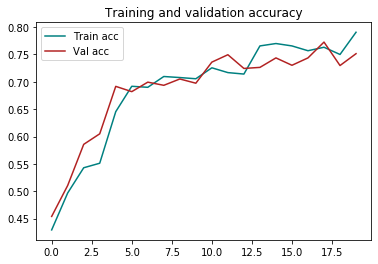

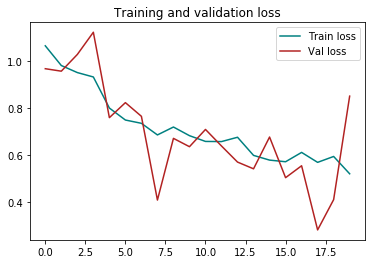

In [117]:
plot_model_sum(hist_5)

## Model 2 - augmentation

In [ ]:
train_aug = image_gen_train.flow_from_directory(directory=train_dir, 
                                            target_size=input_shape, 
                                            batch_size=batch_size,
                                            class_mode='categorical')


val_aug = image_gen_val.flow_from_directory(directory=val_dir, 
                                        target_size=input_shape,
                                         batch_size=batch_size, 
                                         class_mode='categorical')   

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(3)
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_new.summary()

In [116]:
# Fit_generator function

history_new = model_new.fit_generator(generator=train_aug,
                            steps_per_epoch=50,
                            epochs=20, 
                            validation_data=val_aug,
                            validation_steps=val_g.samples // batch_size)
#50 /150

IndentationError: unexpected indent (<ipython-input-116-a435c8e3bf69>, line 4)

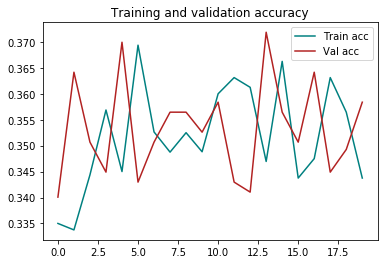

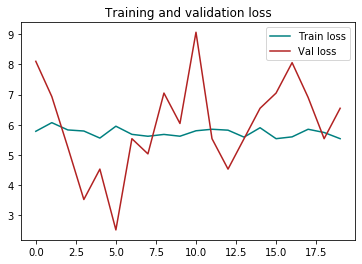

In [114]:
plot_model_sum(history_new)

# Model 3

In [122]:

model_3 = Sequential([
        Conv2D(128, kernel_size=(3, 3), strides=1, activation='relu', padding='same', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(32, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Conv2D(16, kernel_size=(3, 3), strides=1, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2),strides=2),
        Flatten(),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
])

In [123]:
model_3.compile(optimizer='adam', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
             
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 18, 18, 16)      

In [124]:
# Fit_generator function

hist_model_3 = model_3.fit_generator(generator=train_g,
                            steps_per_epoch=50,
                            epochs=120, 
                            validation_data=val_g,
                            validation_steps=val_g.samples // batch_size)
#50 /150

Epoch 1/120
50/50 [==============================] - 226s 5s/step - loss: 1.1002 - accuracy: 0.3546 - val_loss: 1.0985 - val_accuracy: 0.3529
Epoch 2/120
50/50 [==============================] - 183s 4s/step - loss: 1.0981 - accuracy: 0.3431 - val_loss: 1.0973 - val_accuracy: 0.3565
Epoch 3/120
50/50 [==============================] - 163s 3s/step - loss: 1.0984 - accuracy: 0.3456 - val_loss: 1.1021 - val_accuracy: 0.3584
Epoch 4/120
50/50 [==============================] - 175s 4s/step - loss: 1.0968 - accuracy: 0.3719 - val_loss: 1.0989 - val_accuracy: 0.3276
Epoch 5/120
50/50 [==============================] - 169s 3s/step - loss: 1.0972 - accuracy: 0.3520 - val_loss: 1.0977 - val_accuracy: 0.3603
Epoch 6/120
50/50 [==============================] - 164s 3s/step - loss: 1.0988 - accuracy: 0.3500 - val_loss: 1.1007 - val_accuracy: 0.3642
Epoch 7/120
50/50 [==============================] - 164s 3s/step - loss: 1.0971 - accuracy: 0.3587 - val_loss: 1.0930 - val_accuracy: 0.3507
Epoch 

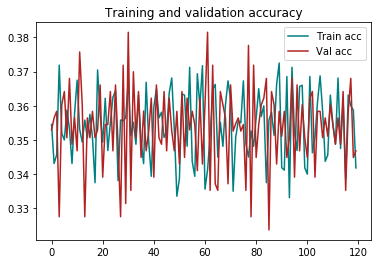

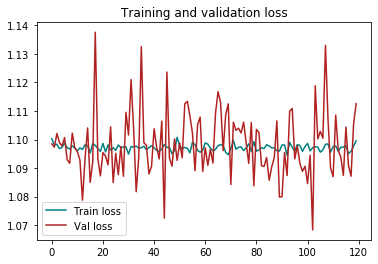

In [126]:
plot_model_sum(hist_model_3)

## Evaluation

lets assumed the base model is the winning one..


In [127]:
# test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(img_dims, img_dims), 
                                                  batch_size=20, 
                                                  class_mode='categorical')

test_loss, test_acc = base.evaluate_generator(test_generator, steps=50)
print('Test acc:', test_acc)

Found 556 images belonging to 3 classes.
Test acc: 0.75


In [128]:
# Create X and Y classes
test_images, test_labels = next(test_generator)

In [131]:
test_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

preds = base.predict(test_images)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = multilabel_confusion_matrix(test_labels, np.round(preds))
cm

array([[[13,  1],
        [ 1,  5]],

       [[ 8,  5],
        [ 1,  6]],

       [[12,  1],
        [ 6,  1]]])

In [136]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_labels, np.round(preds))

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.54


In [138]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(base, test_images, test_labels)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

ValueError: Sequential should be a binary classifier

In [133]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

TypeError: Invalid shape (3, 2, 2) for image data